In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!ls /


bin			    dev     lib32   NGC-DL-CONTAINER-LICENSE  root  tmp
boot			    etc     lib64   opt			      run   tools
content			    home    libx32  proc		      sbin  usr
cuda-keyring_1.1-1_all.deb  kaggle  media   python-apt		      srv   var
datalab			    lib     mnt     python-apt.tar.xz	      sys


In [4]:
!ls /root/.kaggle


kaggle.json


In [5]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()





In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

valid_ds = train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [13]:
history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - accuracy: 0.5297 - loss: 0.7746 - val_accuracy: 0.6316 - val_loss: 0.6269
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.6356 - loss: 0.6465 - val_accuracy: 0.7252 - val_loss: 0.5528
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.7189 - loss: 0.5618 - val_accuracy: 0.8110 - val_loss: 0.4120
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.8065 - loss: 0.4249 - val_accuracy: 0.8650 - val_loss: 0.3101
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.8980 - loss: 0.2527 - val_accuracy: 0.9012 - val_loss: 0.2226
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.9518 - loss: 0.1383 - val_accuracy: 0.9660 - val_loss: 0.1100
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.9789 - loss: 0.0735 - val_accuracy: 0.9636 - val_loss: 0.1074
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9781 - loss: 0.0

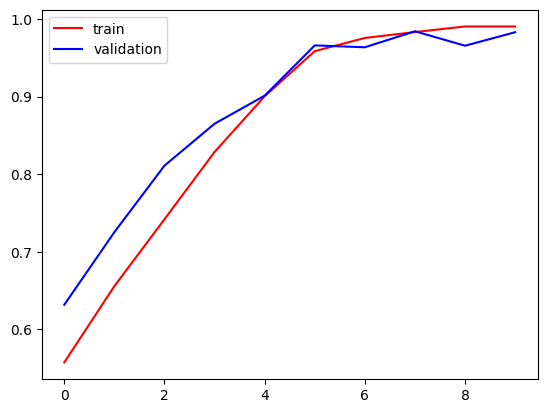

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

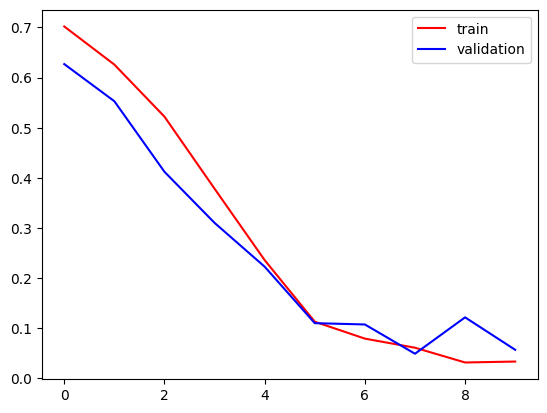

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [43]:
import cv2



In [44]:
test_img_1 = cv2.imread('/content/cat.jpg')



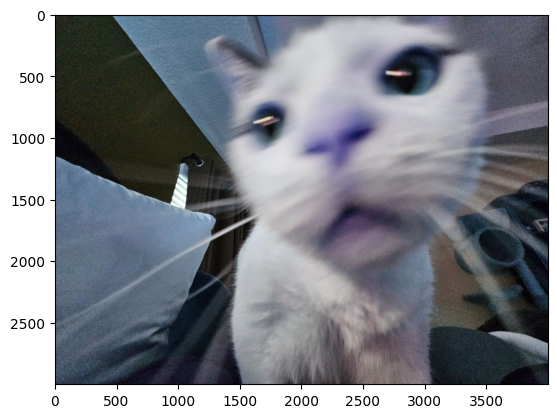

In [45]:
plt.imshow(test_img_1)

In [46]:
test_img_2 = cv2.imread('/content/dog.jpg')



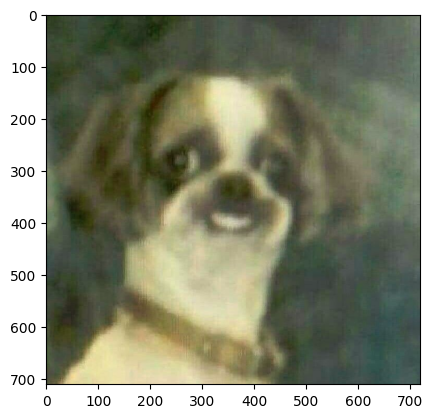

In [47]:
plt.imshow(test_img_2)

In [52]:
print("img1: ", test_img_1.shape)
print("img2: ", test_img_2.shape)

img1:  (3000, 4000, 3)
img2:  (711, 720, 3)


In [53]:
test_img_1= cv2.resize(test_img_1, (256,256))
test_img_2= cv2.resize(test_img_2, (256,256))

In [57]:
test_input_1 = test_img_1.reshape((1,256,256,3))
test_input_2 = test_img_2.reshape((1,256,256,3))
test_output_1 = model.predict(test_input_1)
test_output_2 = model.predict(test_input_2)

print(test_output_1)
print(test_output_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.]]
[[1.]]


# 0 DENOTES CAT

# 1 DENOTES DOG